#### Regime change



In [1]:
import numpy as np
import pandas as pd
import yfinance as yf

start_date = '2000-01-01'
end_date = '2023-08-01'

apple = yf.download('AAPL', start = start_date, end = end_date).iloc[:,:-1]
apple

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close
Date,,,,,
2000-01-03,0.936384,1.004464,0.907924,0.999442,0.848323
2000-01-04,0.966518,0.987723,0.903460,0.915179,0.776801
2000-01-05,0.926339,0.987165,0.919643,0.928571,0.788168
2000-01-06,0.947545,0.955357,0.848214,0.848214,0.719961
2000-01-07,0.861607,0.901786,0.852679,0.888393,0.754065
...,...,...,...,...,...
2023-07-25,193.330002,194.440002,192.919998,193.619995,193.358887
2023-07-26,193.669998,195.639999,193.320007,194.500000,194.237701
2023-07-27,196.020004,197.199997,192.550003,193.220001,192.959427


In [2]:
import AdvancedTimeSeries as ats
import statsmodels.api as sm
import matplotlib.pyplot as plt

cols = ['adfStat','pVal','lags','nObs','95% conf', 'corr']
out = pd.DataFrame(columns = cols)
for d in np.linspace(0, 2, 21):
    try:
        df1 = np.log(apple).dropna()
        df2 = ats.fracDiff(df1, d, thres = 1e-5)
        corr = np.corrcoef(df1.loc[df2.index, 'Close'], df2['Close'])[0,1]
        df2 = sm.tsa.stattools.adfuller(df2['Close'], maxlag = 1, regression = 'c', autolag = None)
        out.loc[d] = list(df2[:4]) + [df2[4]['5%']] + [corr]
    except Exception as e:
        print(f'd: {d}, error: {e}')
        continue

d: 0.1, error: maxlag must be less than (nobs/2 - 1 - ntrend) where n trend is the number of included deterministic regressors
d: 0.2, error: maxlag must be less than (nobs/2 - 1 - ntrend) where n trend is the number of included deterministic regressors


,adfStat,pVal,lags,nObs,95% conf,corr
0.0,0.124110,9.676692e-01,1.0,5928.0,-2.862028,1.000000
0.3,-1.553029,5.071350e-01,1.0,4.0,-4.474365,0.916110
0.4,-1.958614,3.050088e-01,1.0,12.0,-3.154972,0.572164
0.5,-3.347549,1.288230e-02,1.0,30.0,-2.964071,0.230308
0.6,-6.319783,3.086431e-08,1.0,77.0,-2.899878,0.323163
0.7,-8.050696,1.745293e-12,1.0,212.0,-2.875272,0.400274
0.8,-15.400694,3.218181e-28,1.0,638.0,-2.866081,0.180590
0.9,-30.185328,0.000000e+00,1.0,2072.0,-2.862936,0.050541
1.0,-55.830130,0.000000e+00,1.0,5927.0,-2.862028,0.014056
1.1,-53.169961,0.000000e+00,1.0,4361.0,-2.862203,0.002288


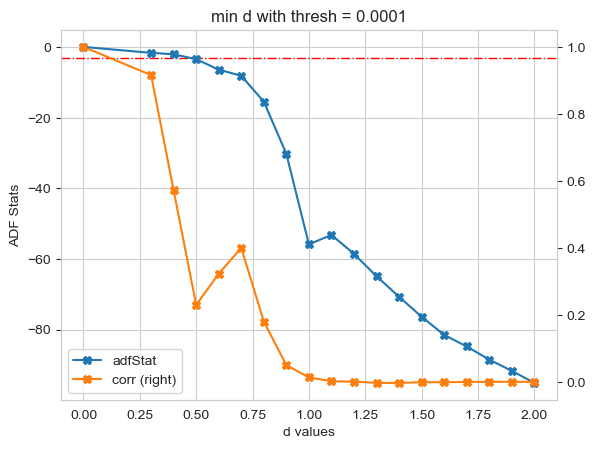

In [3]:
f,ax = plt.subplots()
ax.axhline(out['95% conf'].mean(), lw = 1, color = 'r', ls = '-.')
out[['adfStat', 'corr']].plot(ax = ax, marker = 'X', secondary_y = 'corr')
ax.set_title('min d with thresh = 0.0001')
ax.set_xlabel('d values')
ax.set_ylabel('ADF Stats')
display(out)

Text(0.5, 1.0, 'Expanding Window Fractional Differentiated Series')

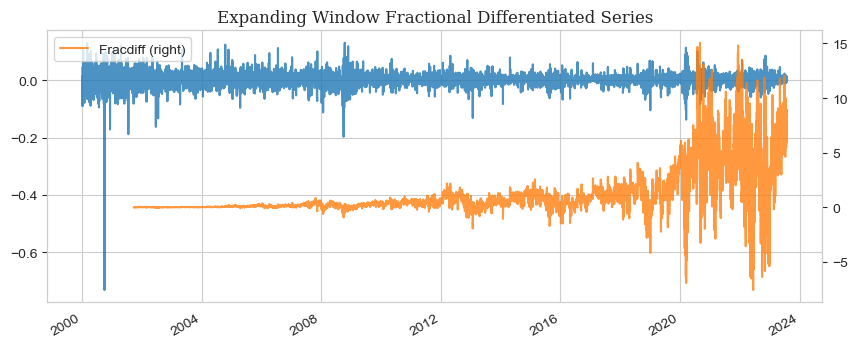

In [4]:
plt.figure(figsize = (10,4))
plt.plot(np.log(apple.Close / apple.Close.shift(1)).dropna(), alpha = 0.8)
ats.fracDiff(apple, 0.5).Close.plot(secondary_y = True, alpha = 0.8, label = 'Fracdiff')
plt.legend()
plt.title('Expanding Window Fractional Differentiated Series', fontfamily = 'Serif', fontsize = 12)

<Axes: xlabel='Close', ylabel='Count'>

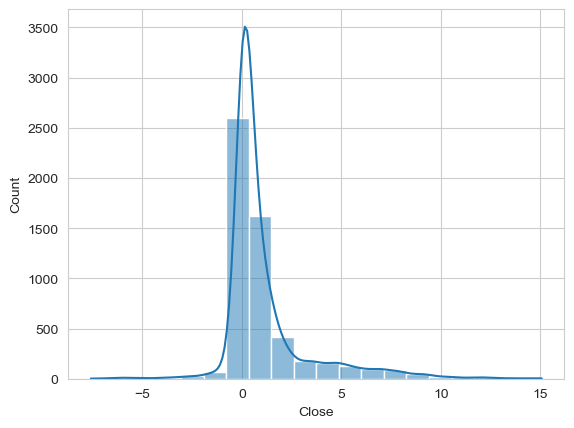

In [5]:
import seaborn as sns
sns.histplot(ats.fracDiff(apple, 0.5).Close, kde = True, bins = 20)

In [6]:
sadf = ats.get_bSADF_test_statistics(np.log(apple.Close), minSL = 100, constant = 'ct', lags = 1)

Text(0.5, 1.0, 'Supremum ADF test (Apple)')

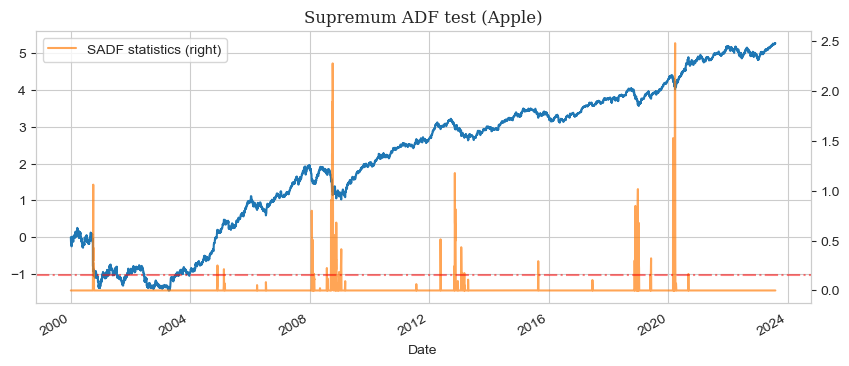

In [8]:
plt.figure(figsize = (10, 4))
plt.plot(np.log(apple.Close))
sadf.plot(secondary_y = True, alpha = 0.7, label = 'SADF statistics')
plt.legend(loc = 'upper left')
plt.axhline(np.log(apple.Close).mean() * (1.65 * np.log(apple.Close).std() / np.sqrt(2158)), color = 'r', ls = '-.', alpha = 0.5)
plt.title('Supremum ADF test (Apple)', fontfamily = 'Serif', fontsize = 12)

In [9]:
ret = ats.fracDiff(apple, 0.5).Close
ret_quantile = pd.qcut(ret, q = 10, labels = range(10))
message = ''.join(map(str, ret_quantile.values))

In [10]:
print(f'Plug-In Entropy estimation: {ats.plug_in(msg = message, w = 100)[0]}')
konto_est = ats.konto(msg = message, window = 100)['h']
print(f'Konto\'s Entropy estimation: {konto_est}')

Plug-In Entropy estimation: 0.12399010832950957
Konto's Entropy estimation: 1.5625494334333054


In [11]:
segments = ats.generate_buckets(series = ret, sigma = ret.std())
ret_sigma = ret.apply(lambda obs: ats.encode_single_obs(obs = obs, segments = segments))
message = ''.join(map(str, ret_sigma.values))

Text(0.5, 1.0, 'Sigma Encoding (Apple)')

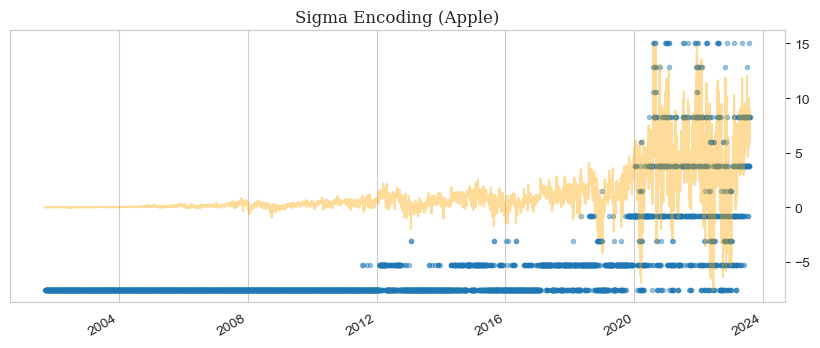

In [12]:
plt.figure(figsize = (10,4))
plt.scatter(ret_sigma.index, ret_sigma, marker = '.', alpha = 0.4)
ret.plot(secondary_y = True, color = 'orange', alpha = 0.4)
plt.title('Sigma Encoding (Apple)', fontfamily = 'Serif', fontsize = 12)

In [13]:
print(f'Plug-In Entropy estimation: {ats.plug_in(msg = message, w = 100)[0]}')
konto_est = ats.konto(msg = message, window = 100)['h']
print(f'Konto\'s Entropy estimation: {konto_est}')

Plug-In Entropy estimation: 0.07378469222301634
Konto's Entropy estimation: 0.6485334541408015


In [14]:
import scipy.stats as ss
from sklearn.metrics import mutual_info_score

In [15]:
bin = ats.OptimizeBins(len(ret), corr = None)
print('Optimized Bin : ', bin)

Optimized Bin :  26


In [16]:
etp = []
for i in range(100, len(ret)) :
    hX = ss.entropy(np.histogram(ret[i-100:i], bin)[0])
    etp.append(hX)
etp = pd.DataFrame(etp, index = ret.index[100:])
etp.columns = ['Market Entropy']
etp

,Market Entropy
2002-02-14,2.941835
2002-02-15,2.928422
2002-02-19,2.928422
2002-02-20,2.910789
2002-02-21,2.911423
...,...
2023-07-25,2.836343
2023-07-26,2.834988
2023-07-27,2.820143
2023-07-28,2.820143


Text(0.5, 1.0, 'Market Entropy versus Fractional Difference')

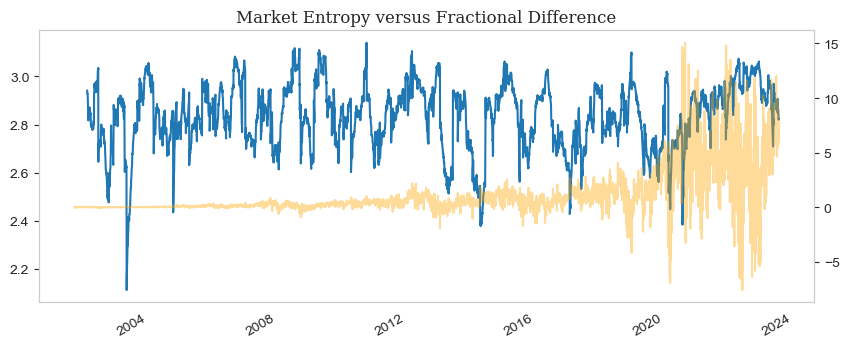

In [17]:
plt.figure(figsize = (10,4))
plt.grid(False)
plt.plot(etp)
ret.plot(secondary_y = True, color = 'orange', alpha = 0.4)
plt.title('Market Entropy versus Fractional Difference', fontfamily = 'Serif', fontsize = 12)

Text(0.5, 1.0, 'Market Entropy versus Fractional Difference')

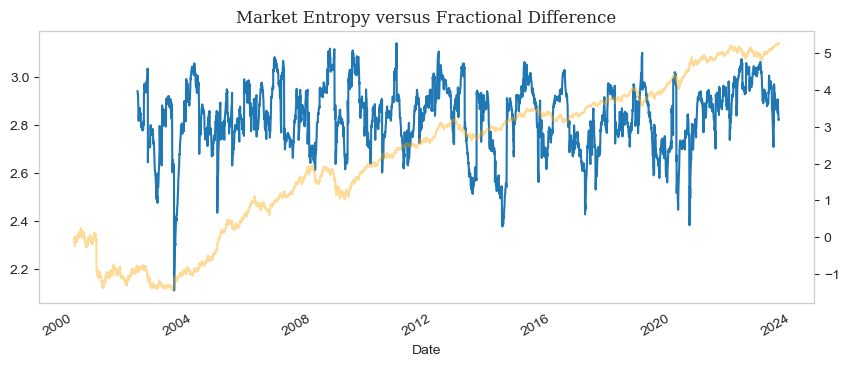

In [18]:
plt.figure(figsize = (10,4))
plt.grid(False)
plt.plot(etp)
np.log(apple.Close).plot(secondary_y = True, color = 'orange', alpha = 0.4)
plt.title('Market Entropy versus Fractional Difference', fontfamily = 'Serif', fontsize = 12)

Text(0.5, 1.0, 'Market Entropy versus Fractional Difference')

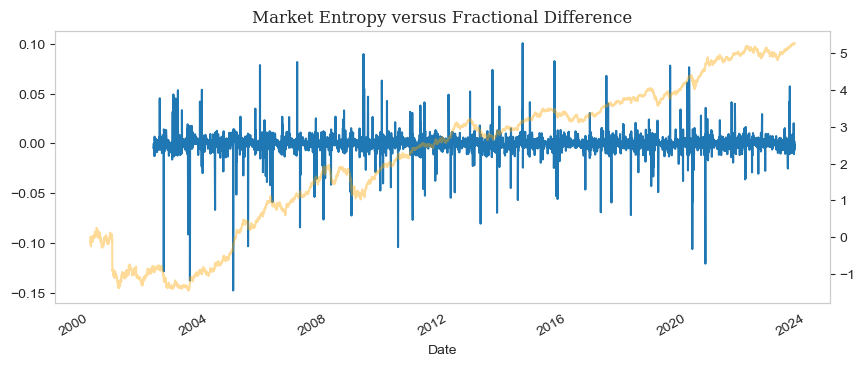

In [19]:
plt.figure(figsize = (10,4))
plt.grid(False)
plt.plot(etp.pct_change())
np.log(apple.Close).plot(secondary_y = True, color = 'orange', alpha = 0.4)
plt.title('Market Entropy versus Fractional Difference', fontfamily = 'Serif', fontsize = 12)

In [20]:
def getBeta(series : pd.DataFrame, sl : int) :
    h1 = series[['High','Low']].values
    h1 = np.log(h1[:,0]/h1[:,1])**2
    h1 = pd.Series(h1, index = series.index)
    beta = h1.rolling(window = 2).sum()
    beta = beta.rolling(window = sl).mean()
    beta = beta.replace([np.inf, -np.inf], np.nan)
    return beta.dropna()

def getGamma(series : pd.DataFrame) :
    h2 = series['High'].rolling(window=2).max()
    l2 = series['Low'].rolling(window=2).min()
    gamma = np.log(h2.values/l2.values)**2
    gamma = pd.Series(gamma, index = h2.index)
    gamma = gamma.replace([np.inf, -np.inf], np.nan)
    return gamma.dropna()

def getAlpha(beta, gamma) :
    alpha = ((np.sqrt(2 * beta) - np.sqrt(beta)) /(3 - (2 * np.sqrt(2)))) - np.sqrt(gamma / (3 - (2 * np.sqrt(2))))
    alpha[alpha<0] = 0
    return alpha.dropna()

def corwinSchultz(series, sl : int = 1) :
    beta = getBeta(series, sl)
    gamma = getGamma(series)
    alpha = getAlpha(beta, gamma)
    spread = 2 * np.exp(alpha - 1)/(1 + np.exp(alpha))
    startTime = pd.Series(series.index[0 : spread.shape[0]], index = spread.index)
    spread = pd.concat([spread,startTime], axis = 1)
    spread.columns = ['Spread', 'Start_time']
    return spread

def getSigma(beta, gamma) :
    k2 = (8/np.pi)**.5
    den = 3-2*2**.5
    sigma = (2**-.5-1)*beta**.5/(k2*den)
    sigma += (gamma/(k2**2*den))**.5
    sigma[sigma<0] = 0
    return sigma

In [21]:
becker_parkinson = getSigma(getBeta(apple, 1), getGamma(apple))
becker_parkinson

Date
2000-01-04    0.016162
2000-01-05    0.013067
2000-01-06    0.081397
2000-01-07    0.039316
2000-01-10    0.014109
                ...   
2023-07-25    0.003860
2023-07-26    0.005906
2023-07-27    0.007562
2023-07-28    0.007161
2023-07-31    0.004082
Length: 5930, dtype: float64

In [22]:
from filterpy.kalman import KalmanFilter
from filterpy.common import Q_discrete_white_noise
import statsmodels.api as sm
class LocalLinearTrend(sm.tsa.statespace.MLEModel):
    def __init__(self, endog):
        # Model order
        k_states = k_posdef = 2
        # Initialize the statespace
        super(LocalLinearTrend, self).__init__(
            endog, k_states=k_states, k_posdef=k_posdef,
            initialization="approximate_diffuse",
            loglikelihood_burn=k_states
        )
        # Initialize the matrices
        self.ssm['design'] = np.array([1, 0])
        self.ssm['transition'] = np.array([[1, 1],
                                           [0, 1]])
        self.ssm['selection'] = np.eye(k_states)
        # Cache some indices
        self._state_cov_idx = ("state_cov",) + np.diag_indices(k_posdef)

    @property
    def param_names(self):
        return ["sigma2.measurement", "sigma2.level", "sigma2.trend"]

    @property
    def start_params(self):
        return [np.std(self.endog)]*3

    def transform_params(self, unconstrained):
        return unconstrained ** 2

    def untransform_params(self, constrained):
        return constrained ** 0.5

    def update(self, params, *args, **kwargs):
        params = super(LocalLinearTrend, self).update(params, *args, **kwargs)
        # Observation covariance
        self.ssm['obs_cov',0,0] = params[0]
        # State covariance
        self.ssm[self._state_cov_idx] = params[1:]

In [23]:
model = LocalLinearTrend(becker_parkinson)
result = model.fit(disp = True)

print(result.summary())

/Users/junghunlee/anaconda3/envs/TimeSeriesModeling/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -7.85341D-02    |proj g|=  2.95188D+00

At iterate    1    f= -1.37506D+00    |proj g|=  7.32800D+00

At iterate    2    f= -1.50076D+00    |proj g|=  1.12375D+01
  ys=-4.292E-02  -gs= 1.455E-01 BFGS update SKIPPED

At iterate    3    f= -1.50498D+00    |proj g|=  1.02109D+01

At iterate    4    f= -1.98130D+00    |proj g|=  1.22907D+01

At iterate    5    f= -2.10813D+00    |proj g|=  1.73360D+01

At iterate    6    f= -2.20304D+00    |proj g|=  2.72998D+01

At iterate    7    f= -2.27144D+00    |proj g|=  5.03168D+01

At iterate    8    f= -2.30684D+00    |proj g|=  6.25290D+01

At iterate    9    f= -2.35828D+00    |proj g|=  1.71860D+02
  ys=-6.185E-02  -gs= 3.541E-02 BFGS update SKIPPED

At iterate   10    f= -2.35845D+00    |proj g|=  1.51362D+02

At iterate   11    f= -2.36142D+00    |proj g|


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/Users/junghunlee/anaconda3/envs/TimeSeriesModeling/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     13     86      2     2     0   2.382D+02  -2.367D+00
  F =  -2.3672212233513337     

ABNORMAL_TERMINATION_IN_LNSRCH                              
                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                 5930
Model:               LocalLinearTrend   Log Likelihood               14037.622
Date:                Tue, 05 Sep 2023   AIC                         -28069.244
Time:                        16:38:20   BIC                         -28049.181
Sample:                     

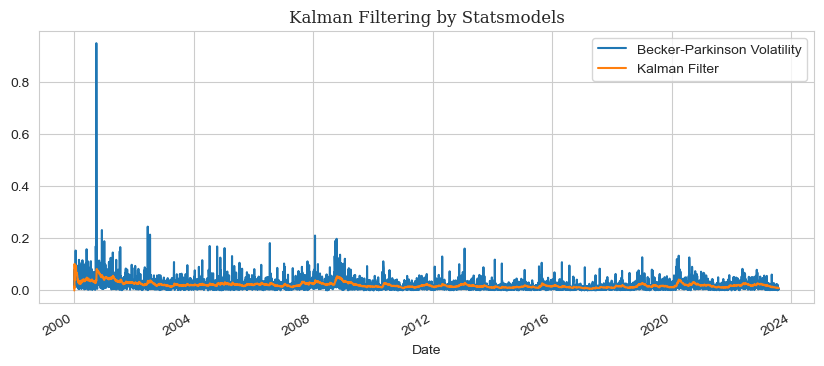

In [24]:
predict = result.get_prediction()
plotting = pd.DataFrame({"Becker-Parkinson Volatility": becker_parkinson,
                      "Kalman Filter": predict.predicted_mean})
plotting.plot(figsize = (10, 4))
plt.title("Kalman Filtering by Statsmodels", fontfamily = 'Serif', fontsize = 12)
plt.show()

In [25]:
ret = np.log(apple.Close / apple.Close.shift(1)).dropna()

In [26]:
volatility = predict.predicted_mean

In [27]:
ma5 = apple.Close.rolling(window = 5, center = False).mean()
ma60 = apple.Close.rolling(window = 60, center = False).mean()

In [28]:
fracdiff = ats.fracDiff_FFD(apple, 0.5).Close

In [29]:
#rsi = momentum.rsi(apple.Close)

In [30]:
matrix = pd.concat([ret, fracdiff, sadf, etp, volatility, ma5, ma60], axis = 1).dropna()
matrix.columns = ['Log return','Fracdiff','SADF','Entropy','Volatility','MA5','MA60']
matrix

,Log return,Fracdiff,SADF,Entropy,Volatility,MA5,MA60
2003-09-11,0.016988,0.018931,0.0,2.899554,0.019018,0.401250,0.366414
2003-09-12,0.023655,0.025608,0.0,2.889941,0.018462,0.403393,0.367598
2003-09-15,-0.039290,0.004163,0.0,2.898572,0.018435,0.401500,0.368512
2003-09-16,0.006732,0.013163,0.0,2.885159,0.018242,0.401464,0.369452
2003-09-17,-0.010792,0.008607,0.0,2.867627,0.017827,0.401250,0.370363
...,...,...,...,...,...,...,...
2023-07-25,0.004503,7.772236,0.0,2.836343,0.009649,193.308002,181.759334
2023-07-26,0.004535,8.128767,0.0,2.834988,0.009400,193.188000,182.173000
2023-07-27,-0.006603,6.232856,0.0,2.820143,0.009243,193.206000,182.566834
2023-07-28,0.013418,9.258247,0.0,2.820143,0.009158,193.984000,183.021667


In [31]:
matrix['Labels'] = 0
matrix.loc[matrix['MA5'] > matrix['MA60'], 'Labels'] = 1

In [32]:
matrix

,Log return,Fracdiff,SADF,Entropy,Volatility,MA5,MA60,Labels
2003-09-11,0.016988,0.018931,0.0,2.899554,0.019018,0.401250,0.366414,1
2003-09-12,0.023655,0.025608,0.0,2.889941,0.018462,0.403393,0.367598,1
2003-09-15,-0.039290,0.004163,0.0,2.898572,0.018435,0.401500,0.368512,1
2003-09-16,0.006732,0.013163,0.0,2.885159,0.018242,0.401464,0.369452,1
2003-09-17,-0.010792,0.008607,0.0,2.867627,0.017827,0.401250,0.370363,1
...,...,...,...,...,...,...,...,...
2023-07-25,0.004503,7.772236,0.0,2.836343,0.009649,193.308002,181.759334,1
2023-07-26,0.004535,8.128767,0.0,2.834988,0.009400,193.188000,182.173000,1
2023-07-27,-0.006603,6.232856,0.0,2.820143,0.009243,193.206000,182.566834,1
2023-07-28,0.013418,9.258247,0.0,2.820143,0.009158,193.984000,183.021667,1


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

In [34]:
X = matrix.iloc[:,:-3]
y = matrix['Labels']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = False)

rf = RandomForestClassifier(n_estimators = 1000, 
                            criterion = "entropy", 
                            bootstrap = True, n_jobs=1, 
                            random_state = 42, 
                            class_weight = 'balanced_subsample', 
                            oob_score = False)
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       n_estimators=1000, n_jobs=1, random_state=42)

              precision    recall  f1-score   support

    no trade       0.74      0.38      0.50       306
       trade       0.77      0.94      0.85       695

    accuracy                           0.77      1001
   macro avg       0.76      0.66      0.67      1001
weighted avg       0.76      0.77      0.74      1001


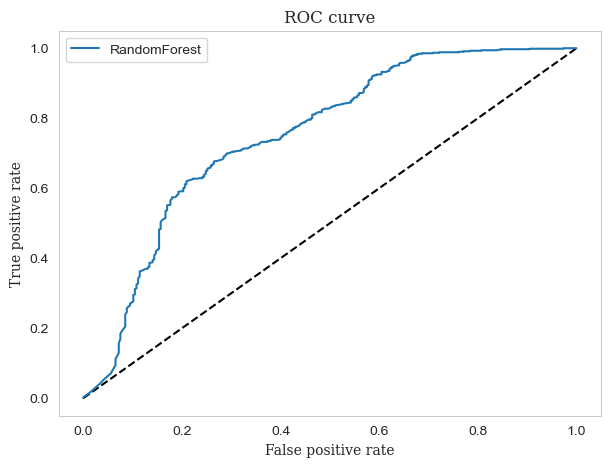

In [35]:
fit = rf.fit(X_train, y_train)
y_pred_rf = fit.predict_proba(X_test)[:, 1]
y_pred = fit.predict(X_test)
fpr_bc, tpr_bc, _ = roc_curve(y_test, y_pred_rf)
print(classification_report(y_test, y_pred, target_names = ['no trade',' trade']))

plt.figure(figsize = (7,5))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_bc, tpr_bc, label = 'RandomForest')
plt.grid(False)
plt.xlabel('False positive rate', fontfamily = 'Serif')
plt.ylabel('True positive rate', fontfamily = 'Serif')
plt.title('ROC curve', fontsize = 12, fontfamily = 'Serif')
plt.legend(loc = 'best')
plt.show()

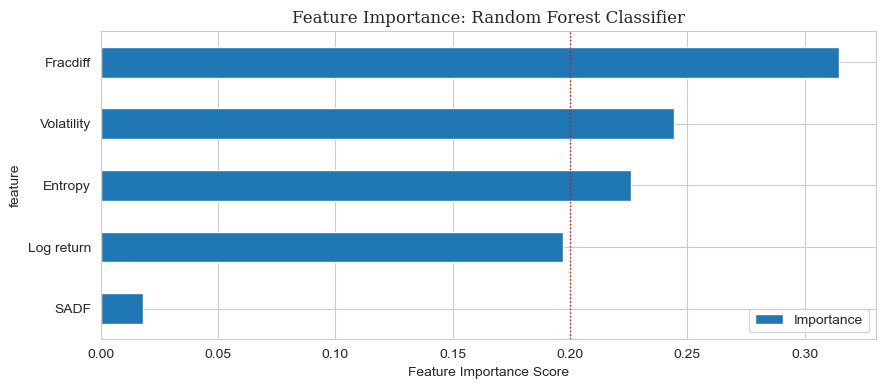

In [36]:
title = 'Feature Importance: Random Forest Classifier'
figsize = (10, 4)

feat_imp = pd.DataFrame({'Importance':rf.feature_importances_})
feat_imp['feature'] = X.columns
feat_imp.sort_values(by='Importance', ascending = False, inplace = True)
feat_imp = feat_imp

feat_imp.sort_values(by = 'Importance', inplace = True)
feat_imp = feat_imp.set_index('feature', drop = True)
feat_imp.plot.barh(figsize = figsize)
plt.axvline(1. / feat_imp.shape[0], linewidth = 1, color='r', linestyle='dotted')
plt.xlabel('Feature Importance Score')
plt.title(title, fontsize = 12, fontfamily = 'Serif')
plt.show()

In [37]:
from statsmodels.tsa.stattools import coint

score, p_value, _ = coint(matrix['Volatility'], matrix['Entropy'])
print('Correlation : %.4f' % matrix['Volatility'].corr(matrix['Entropy']))
print('Cointegration test p-value : %.4f' % p_value)
print('Cointegration test score : %.4f'  % score)

Correlation : 0.0977
Cointegration test p-value : 0.0002
Cointegration test score : -4.9112


In [38]:
from OptimalClustering import clusterKMeansBase

corr0, clstrs, silh = clusterKMeansBase(X.corr(), maxNumClusters = 10, n_init = 10)

maxNumClusters2


In [39]:
from featureImportance import featImpMDI_Clustered, featImpMDA, featImpMDI

imp = featImpMDA(fit, X_train, y_train)

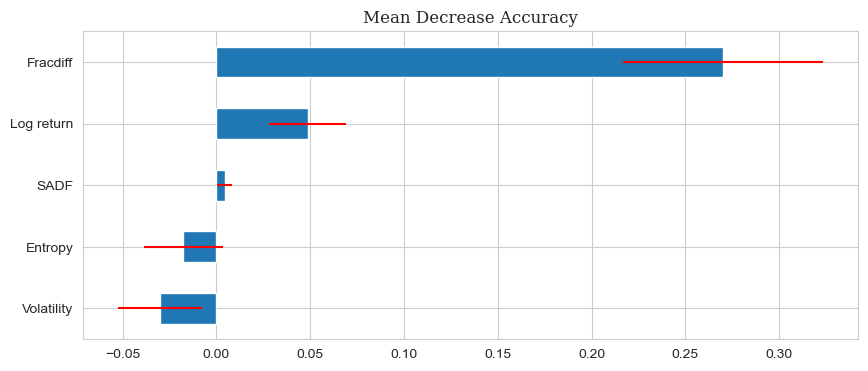

In [40]:
imp.sort_values('mean', inplace=True)
plt.figure(figsize=(10, 4))
imp['mean'].plot(kind='barh', xerr = imp['std'], error_kw = {'ecolor': 'r'})
plt.title('Mean Decrease Accuracy', fontsize = 12, fontfamily = 'Serif')
plt.show()

In [41]:
imp = featImpMDI(fit, featNames = X.columns)

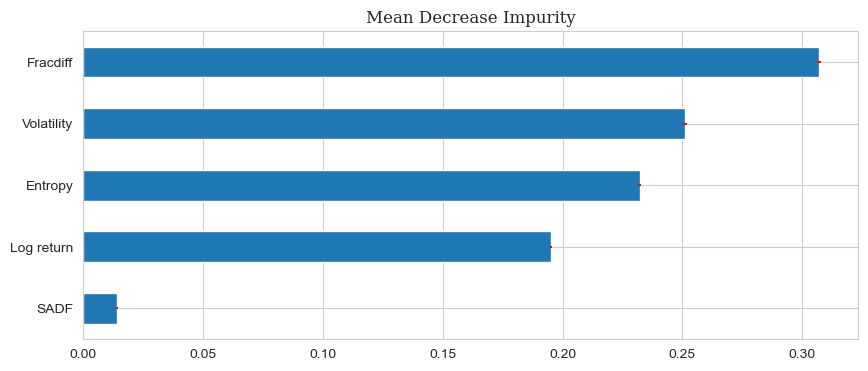

In [42]:
imp.sort_values('mean', inplace=True)
plt.figure(figsize=(10, 4))
imp['mean'].plot(kind='barh', xerr = imp['std'], error_kw = {'ecolor': 'r'})
plt.title('Mean Decrease Impurity', fontsize = 12, fontfamily = 'Serif')
plt.show()

Backtest

In [43]:
backtest = pd.DataFrame()
backtest['Predict'] = fit.predict(X_test)
backtest['Actual'] = y_test.values
backtest['Betting Size'] = fit.predict_proba(X_test)[:,1]
backtest['Return'] = X_test['Log return'].values
backtest['Backtest'] = fit.predict_proba(X_test)[:,1] * X_test['Log return'].values
backtest.index = X_test.index
backtest

,Predict,Actual,Betting Size,Return,Backtest
2019-08-08,1,1,0.973,0.021816,0.021227
2019-08-09,1,1,0.860,-0.012067,-0.010377
2019-08-12,1,1,0.882,-0.002541,-0.002241
2019-08-13,1,1,0.906,0.041476,0.037577
2019-08-14,1,1,0.958,-0.030217,-0.028948
...,...,...,...,...,...
2023-07-25,1,1,0.977,0.004503,0.004400
2023-07-26,1,1,0.972,0.004535,0.004408
2023-07-27,1,1,0.984,-0.006603,-0.006497
2023-07-28,1,1,0.909,0.013418,0.012197


Text(0.5, 1.0, 'Becktesting Machine Learning Model(Apple)')

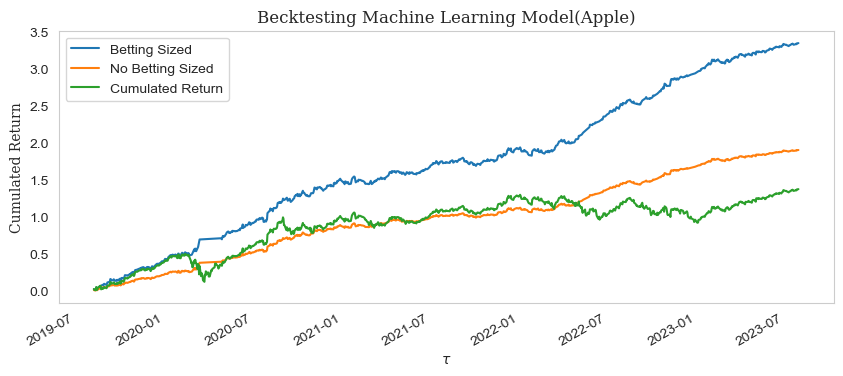

In [44]:
plt.figure(figsize = (10,4))
backtest[backtest['Predict'] == 1]['Backtest'].cumsum().plot(label = 'Betting Sized')
(backtest[backtest['Predict'] == 1]['Return'].cumsum()/2).plot(label = 'No Betting Sized')
backtest['Return'].cumsum().plot(label = 'Cumulated Return')
plt.legend()
plt.grid(False)
plt.xlabel(r'$\tau$')
plt.ylabel(r'Cumulated Return', fontfamily = 'Serif')
plt.title('Becktesting Machine Learning Model(Apple)', fontsize = 12, fontfamily = 'Serif')